In [6]:
from scipy.io.arff import loadarff
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import zscore

data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
y = df['class']

model = RandomForestClassifier()
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=0) 

# Exercise 1

## a)

/home/joao_fidalgo/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joao_fidalgo/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


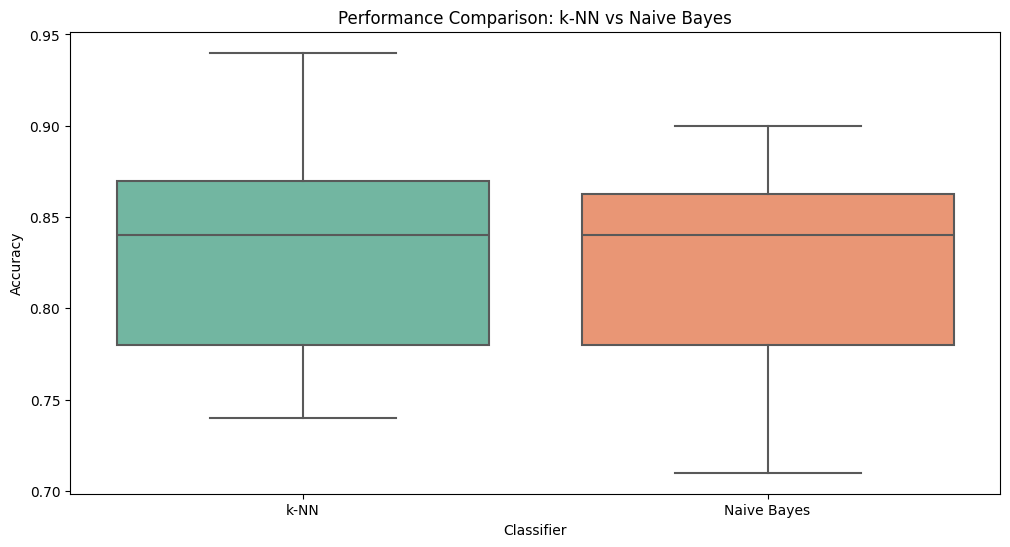

In [2]:
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()
accuracies = {"k-NN": [], "Naive Bayes": []}

for train_k, test_k in folds.split(X, y):
    X_train, X_test = X.iloc[train_k], X.iloc[test_k]
    y_train, y_test = y.iloc[train_k], y.iloc[test_k]
    
    knn.fit(X_train, y_train)
    nb.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    nb_pred = nb.predict(X_test)
    
    knn_accuracy = metrics.accuracy_score(y_test, knn_pred)
    nb_accuracy = metrics.accuracy_score(y_test, nb_pred)
    accuracies["k-NN"].append(round(metrics.accuracy_score(y_test, knn_pred),2))
    accuracies["Naive Bayes"].append(round(metrics.accuracy_score(y_test, nb_pred),2))
    
       
accs_df = pd.DataFrame(accuracies)
plt.figure(figsize=(12, 6))
sns.boxplot(data=accs_df, palette="Set2")
plt.title('Performance Comparison: k-NN vs Naive Bayes')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.show()

## b)

In [3]:
p_value = stats.ttest_ind(accuracies["k-NN"], accuracies["Naive Bayes"]).pvalue
print(f"P-value: {p_value}")

P-value: 0.5559851671434344


With the calculated p-value of approximately 0.35, we can conclude that there is not evidence enough to claim that k-NN is statistically superior to Naive Bayes, regarding accuracy based, on the observed data, thus rejecting the null hypothesis.

# Exercise 2

<Axes: >

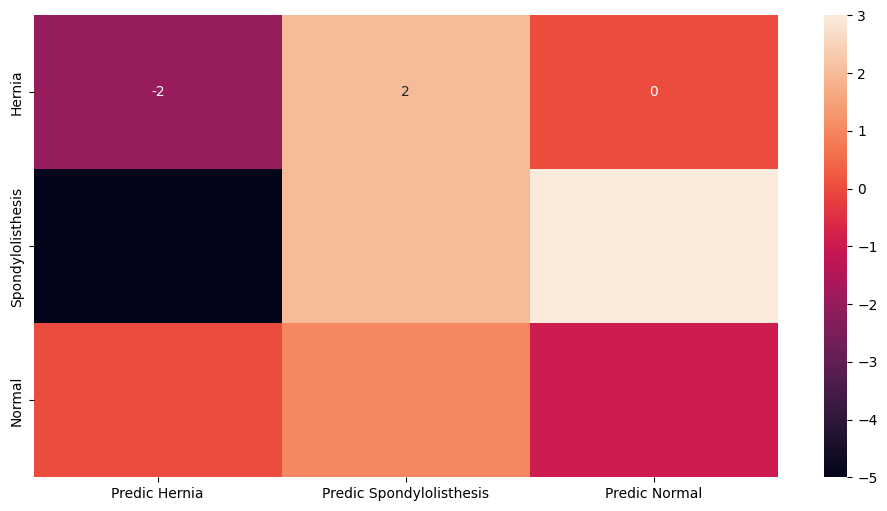

In [4]:
knn_1 = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
knn_5 = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
conf_matrix_1 = np.zeros((3, 3))
conf_matrix_5 = np.zeros((3, 3))

for train_k, test_k in folds.split(X, y):
    X_train, X_test = X.iloc[train_k], X.iloc[test_k]
    y_train, y_test = y.iloc[train_k], y.iloc[test_k]
       
    knn_1.fit(X_train, y_train)
    knn_5.fit(X_train, y_train)
    
    knn_pred_1 = knn_1.predict(X_test)
    knn_pred_5 = knn_5.predict(X_test)
    
    conf_matrix_1 += confusion_matrix(y_test, knn_pred_1)
    conf_matrix_5 += confusion_matrix(y_test, knn_pred_5)

conf_matrix_diff = conf_matrix_1 - conf_matrix_5

plt.figure(figsize=(12, 6))
cm = pd.DataFrame(conf_matrix_diff, index=['Hernia', 'Spondylolisthesis', 'Normal'], columns=['Predic Hernia', 'Predic Spondylolisthesis', 'Predic Normal'])
sns.heatmap(cm, annot=True, fmt='g')


From the results given by the heatmap that represents the difference between the k-nearest neighbours method when k = 1 or 5, we can say that both predictors have a similar behaviour, because there is no big difference in any case. We can imply, that the neighbours from 1 to 5 yield similar outcomes, which could be because the data isn't very noisy nor complex.

# Exercise 3

In [5]:
#1
correlations = spearmanr(X).statistic
print(correlations)
print("\n")

#3
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
z_scores = zscore(X)
outliers = (X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))

outliers_count_per_feature = pd.DataFrame(outliers, columns=X.columns).sum()
print(outliers_count_per_feature)
print(len(X))


[[ 1.          0.65315204  0.77849937  0.80082955 -0.26654025  0.67077822]
 [ 0.65315204  1.          0.41874285  0.12405479 -0.00691726  0.39676684]
 [ 0.77849937  0.41874285  1.          0.69280319 -0.13418023  0.68362926]
 [ 0.80082955  0.12405479  0.69280319  1.         -0.36562411  0.5327264 ]
 [-0.26654025 -0.00691726 -0.13418023 -0.36562411  1.         -0.1742733 ]
 [ 0.67077822  0.39676684  0.68362926  0.5327264  -0.1742733   1.        ]]


pelvic_incidence             3
pelvic_tilt                 13
lumbar_lordosis_angle        1
sacral_slope                 1
pelvic_radius               11
degree_spondylolisthesis    10
dtype: int64
310


- As we can see from the spearman correlation values between the features of column_diagnosis, there are high correlations values, meaning not all features are independent from each other, which is one of Naive Bayes method flaws, because it assumes that all features are independent.
- Variables are not normally distributed, which is a Gaussian Naive Bayes prediction problem, because it assumes that all data is normalized.)
- Finally, the Gaussian Naive Bayes, is sensitive to outliers, which by the values calculated aren't a lot, so it really isn't a difficulty for this data set. Nonetheless, we find important to check this numbers, due to the influence that they have in the statistics that generate the predictions. This happens because the calculations made in this method rely on mean and variance values
- TODO 1more.;